# Clustering with K-means

In the unsupervised setting, one of the most straightforward tasks we can perform is to find groups of data instances which are similar between each other. We call such groups of data points clusters.

We position ourselves in the setting where we have access to a dataset $D$ that consists of instances $x \in \mathbb{R}^n$. For example, if our instances have two features $x_1$ and $x_2$ we are in the $\mathbb{R}^2$ space. For simplicity and visualization purposes in this session, we assume our data to be 2-dimensional. That said, the method (as well as the implementation) generalizes to more dimensions in a straightforward way.   

$k$-Means is one of the most popular and representative "clustering" algorithms. $k$-means stores $k$ centroids, that is points in the $n$-dimensional space which are then used to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. 

### The optimization algorithm
The most common algorithm uses an iterative refinement technique. $k$-means is a ubiquitous case of the Expectation Maximization algorithm for clustering; it is also referred to as Lloyd's algorithm.

Given an initial set of $k$ centroids $m_1(1), \ldots, m_k(1)$ , the algorithm proceeds by alternating between two steps:

- Assignment step: Assign each observation to the cluster whose mean yields the least within-cluster sum of squares (WCSS). Since the sum of squares is the squared Euclidean distance, this is intuitively the "nearest" mean.

- Update step: Calculate the new means to be the centroids of the observations in the new clusters. Since the arithmetic mean is a least-squares estimator, this also minimizes the within-cluster sum of squares (WCSS) objective.

The algorithm has converged when the assignments no longer change. Since both steps optimize the WCSS objective, and there only exists a finite number of such partitionings, the algorithm must converge to a (local) optimum. There is no guarantee that the global optimum is found using this algorithm.

The algorithm is often presented as assigning objects to the nearest cluster by distance. The standard algorithm aims at minimizing the WCSS objective, and thus assigns by "least sum of squares", which is exactly equivalent to assigning by the smallest Euclidean distance. Using a different distance function other than (squared) Euclidean distance may stop the algorithm from converging.

### Illustration of training

To make it easier to understand, the figure belows illustrates the process.

![K-Means illustration](./kmeansViz.png)

The figure depicts the k-means algorithm (Images courtesy of Michael Jordan and adapted from http://stanford.edu/~cpiech/cs221/handouts/kmeans.html). The training examples are shown as dots, and the cluster centroids are shown as crosses. (a) the dataset, (b) random initial cluster centroids -- one may initialize the algorithm using data points as centroids also, (c-f) illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. 

### Today

Our goal today, is to run K-means on a real dataset. This dataset was first created to study genetic diversity accross America and consists of 494 individuals coming from 27 different tribes (across 10 countries). These individuals are described by their genetic profil in terms of micro-satellites. In addition we have information about the precise location of the tribes, given by the latitude and longitude features.

**TO DO** : 

**Import the data** 
* import the data NAm2.txt using pandas dataframe that you will name df. 
* print the first line of df and its dimension
* Create two lists containing the name of the tribes (Pop) and the country (Country). -> see unique() from pandas

**Pre-processing**
* create a subset of df by only keeping genetic features. This new dataframe is name df_micro.
* do you need to scale the data?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('NAm2.txt', sep=" ")
print(df.head())
print(df.shape)

             IndivID  PopID        Pop Country Continent  sex    lat   long  \
Chipewyan29     2012    811  Chipewyan  Canada   AMERICA    0  59.55 -107.3   
Chipewyan31     2156    811  Chipewyan  Canada   AMERICA    0  59.55 -107.3   
Chipewyan33     2381    811  Chipewyan  Canada   AMERICA    0  59.55 -107.3   
Chipewyan35     2382    811  Chipewyan  Canada   AMERICA    0  59.55 -107.3   
Chipewyan37     2383    811  Chipewyan  Canada   AMERICA    0  59.55 -107.3   

             L1.125  L1.130    ...     L677.255.553287981859  L677.259  \
Chipewyan29       0       0    ...                         0         0   
Chipewyan31       0       0    ...                         0         0   
Chipewyan33       0       0    ...                         0         0   
Chipewyan35       0       0    ...                         0         0   
Chipewyan37       0       0    ...                         0         1   

             L677.263  L677.267  L678.202  L678.206  L678.209.848101265823  \
Ch

In [3]:
# List of populations/tribes
tribes = df.Pop.unique()
country = df.Country.unique()
print(tribes)
print(country)

['Chipewyan' 'Cree' 'Ojibwa' 'Kaqchikel' 'Mixtec' 'Mixe' 'Zapotec' 'Guaymi'
 'Cabecar' 'Aymara' 'Huilliche' 'Guarani' 'Ache' 'Kaingang' 'Quechua'
 'Kogi' 'Inga' 'Wayuu' 'TicunaArara' 'Embera' 'Waunana' 'Arhuaco' 'Piapoco'
 'Karitiana' 'Surui' 'Maya' 'Pima']
['Canada' 'Guatemala' 'Mexico' 'Panama' 'CostaRica' 'Chile' 'Brazil'
 'Paraguay' 'Peru' 'Colombia']


In [4]:
# The features that we need for clustering starts from the 9th one 
# Subset of the dataframe 
df_micro = df.iloc[0:494,8:5717]
df_micro.shape

(494, 5709)

### Visualisation with PCA

**Wikipedia**

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. 

Basically we will only use PCA for a visualisation purpose. Our goal is to get a 2D visualisation of a 5717-dimensional dataset. Just keep in mind that PCA relies on the assumption that the data are linearly separable, but it's not always the case! 

TO DO : execute the following code!

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Y_sklearn = pca.fit(df_micro)
projected = pca.fit_transform(df_micro)

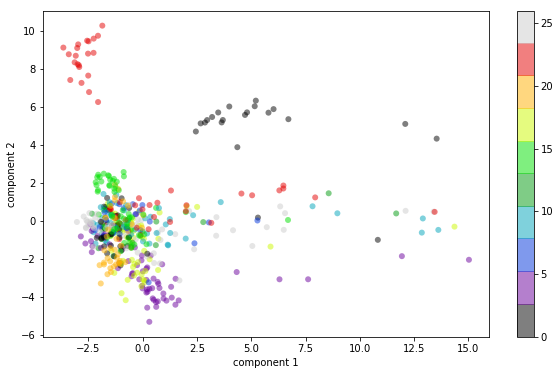

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

plt.scatter(projected[:, 0], projected[:, 1],
            c=df.Pop.astype('category').cat.codes, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Running K-means

We are now ready to run Kmeans! To this end, we will use the implementation given by scikit learn. 
As for the previous session, we first initialise the algorithm then fit it to our data.

**TO DO** : 
* run Kmeans and set the number of clusters to 10
* describe the obtained labels (distribution of objects among them) 
* print the obtained centroids 
* use the pca plot to visualise the labels obtained with Kmeans. To this end, you just need to change the parameters c in the previous scatter plot and to replace the current one with the obtained labels.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
res = kmeans.fit(df_micro)
labels = res.labels_
res.cluster_centers_

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          8.33333333e-01,  -1.04083409e-17,   0.00000000e+00],
       [  8.67361738e-19,   8.67361738e-19,   8.67361738e-19, ...,
          9.09090909e-01,  -8.67361738e-18,   1.73472348e-18],
       [  1.30104261e-18,   1.30104261e-18,   1.30104261e-18, ...,
          9.60000000e-01,   4.00000000e-02,   2.60208521e-18],
       ..., 
       [  1.30104261e-18,   1.30104261e-18,   1.30104261e-18, ...,
          1.00000000e+00,  -3.46944695e-18,   2.60208521e-18],
       [  3.93700787e-03,   3.93700787e-03,   3.93700787e-03, ...,
          8.77952756e-01,   1.96850394e-02,   7.87401575e-03],
       [  8.67361738e-19,   8.67361738e-19,   8.67361738e-19, ...,
          1.00000000e+00,  -1.73472348e-18,   1.73472348e-18]])

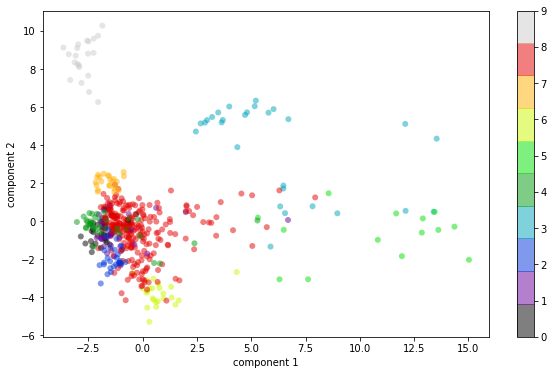

In [8]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Initialisation : be careful!

The initialisation step requires the to set the number of clusters K. To this end, one can either use a priori information and set it manually but there also exists several approach to determine it, including for instance, the Elbow method and the Gap Statistic.

In addition one need to initialise the centroid. Commonly used initialization methods are Forgy and Random Partition. The Forgy method randomly chooses $k$ observations from the data set and uses them as the initial means. The Random Partition method first randomly assigns a cluster to each observation and then proceeds to the update step, thus computing the initial mean to be the centroid of the cluster's randomly assigned points. The Forgy method tends to spread the initial means out, while Random Partition places all of them close to the center of the data set. For expectation maximization and standard k-means algorithms, the Forgy method of initialization is preferable.

TO DO : 
* run Kmeans twice (with K=10 to speed up things) on the df_micro data with random intialisations then compare the obtained labels from both runs with the adjusted rand index from the metric library (available in sklearn).  
* same than before but this time set the number of initialisation to 50.  
* swith the initialisation method to Kmeans++ and run previous experiments once again

In [9]:
from sklearn import metrics

# 1 random initisalition
kmeans = KMeans(n_clusters=10, init='random')
res = kmeans.fit(df_micro)
label_1 = res.labels_
centroids_1 = res.cluster_centers_

kmeans = KMeans(n_clusters=10, init='random')
res = kmeans.fit(df_micro)
label_2 = res.labels_
centroids_2 = res.cluster_centers_

metrics.adjusted_rand_score(label_1, label_2)  

0.23552000105451742

In [10]:
# 50 random initialisations
kmeans = KMeans(n_clusters=10, init='random', n_init=50)
res = kmeans.fit(df_micro)
label_1 = res.labels_
centroids_1 = res.cluster_centers_

kmeans = KMeans(n_clusters=10, init='random',n_init=50)
res = kmeans.fit(df_micro)
label_2 = res.labels_
centroids_2 = res.cluster_centers_

metrics.adjusted_rand_score(label_1, label_2)  

0.51986011535977439

In [75]:
# 50 initisalition and improve strategy
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=50)
res = kmeans.fit(df_micro)
label_1 = res.labels_
centroids_1 = res.cluster_centers_

kmeans = KMeans(n_clusters=10, init='k-means++',n_init=50)
res = kmeans.fit(df_micro)
label_2 = res.labels_
centroids_2 = res.cluster_centers_

metrics.adjusted_rand_score(label_1, label_2)  

0.77518034438837935

### How to set k ? 

#### The Elbow method
The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. This method looks at the percentage of variance explained as a function of the number of clusters. One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

If one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"

In [48]:
cluster_range = range(1,50)
cluster_errors = []

for num_clusters in cluster_range:
  clust = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
  clust.fit(df_micro)
  cluster_errors.append(clust.inertia_)

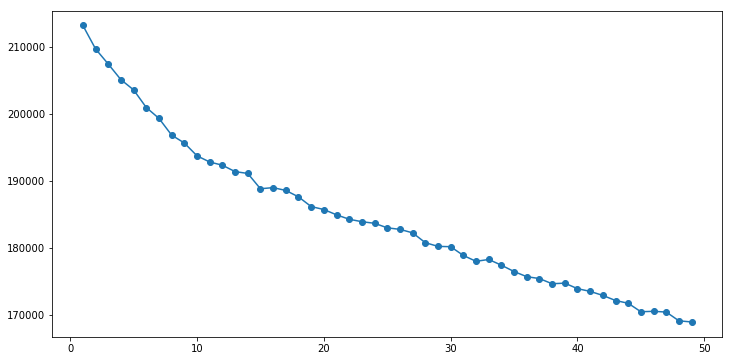

In [49]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Gap Statistic

The Gap Statistic was developped by reasearchers from stanford, and relies on the variation of the within-cluster variation. To have more details, you  
To compute it we will use the implementation of https://github.com/milesgranger/gap_statistic

TO DO  
* Install the library gap statistic 
* Run the optimalK function on df_micro with a maximum number of clusters set to 30

In [17]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [22]:
k, gapdf = optimalK(df_micro, nrefs=5, maxClusters=30)
print ('Optimal k is: ', k)

Optimal k is:  14


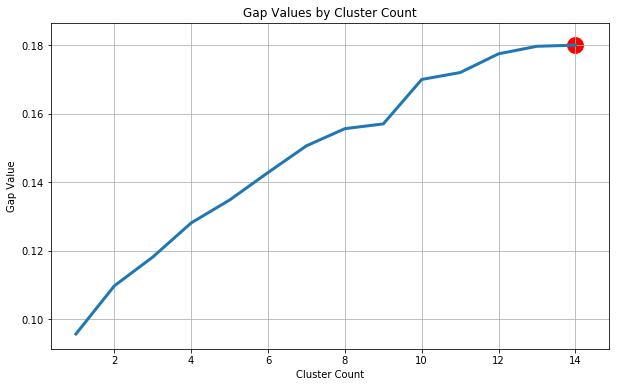

In [27]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

## What about mixture model ?

In the probabilistic framework of mixture models, we assume that the data are generated according to a mixture of probability density functions, with cluster-specific parameters. 

$$ p(x,\theta) = \sum_k \pi_k f(x,\theta_k)$$

where, $\pi_k$ can be interpreted as the proportion of each cluster and $\theta_k$ is the set of parameters. For instance, in the case of a Gaussian mixture we have $\theta_k = (\mu_k,\sigma_k)$.
Then, the goal is to estimate the set of parameters $\theta_k$ and to compute the partition of the objects which is assumed to a hidden variable of the model. 



In [29]:
# 1 run of the Gaussian mixture models
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=10).fit(df_micro)
labels_gmm = gmm.predict(df_micro)